In [ ]:
pip install osmnx

In [ ]:
pip install pyproj

In [20]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import osmnx as ox
import pyproj
import seaborn as sns

In [9]:
#Projection Initialization
P=pyproj.Proj(proj='utm', zone=52, ellps='WGS84', preserve_units=True)

In [3]:
#importing road network dataset using OSMX
#Boundary Coordinate (35.2786,35.1047,129.0396,128.8490)
#df_line_drive contain connectivity and length information
#df_line_walk contain connectivity and length information
#df_node_drive contain osmid and coordinate in WGS 84
#df_node_walk contain osmid and coordinate in WGS 84
osm_road_drive=ox.graph_from_bbox(35.2786,35.1047,129.0396,128.8490, network_type='drive')
osm_road_walk=ox.graph_from_bbox(35.2786,35.1047,129.0396,128.8490, network_type='all_private')
df_line_drive=ox.graph_to_gdfs(osm_road_drive,nodes=False,edges=True)
df_node_drive=ox.graph_to_gdfs(osm_road_drive,nodes=True,edges=False)
df_line_walk=ox.graph_to_gdfs(osm_road_walk, nodes=False, edges=True)
df_node_walk=ox.graph_to_gdfs(osm_road_walk,nodes=True, edges=False)

In [4]:
#Retrieving Geometry data from df_line_drive
df_line_drive.reset_index(inplace=True)
df_line_walk.reset_index(inplace=True)
df_line_drive['x']=df_line_drive['geometry'].apply(lambda geom: [coord[0] for coord in list(geom.coords)])
df_line_drive['y']=df_line_drive['geometry'].apply(lambda geom: [coord[1] for coord in list(geom.coords)])
df_line_walk['x']=df_line_walk['geometry'].apply(lambda geom: [coord[0] for coord in list(geom.coords)])
df_line_walk['y']=df_line_walk['geometry'].apply(lambda geom: [coord[1] for coord in list(geom.coords)])

In [10]:
#projecting df_node_drive
for index,row in df_node_drive.iterrows():
  X_WGS=df_node_drive.loc[index,'x']
  Y_WGS=df_node_drive.loc[index,'y']
  UTM=P(X_WGS,Y_WGS)
  df_node_drive.loc[index,'X_UTM']=UTM[0]
  df_node_drive.loc[index,'Y_UTM']=UTM[1]

#projecting df_node_walk
for index,row in df_node_walk.iterrows():
  X_WGS=df_node_walk.loc[index,'x']
  Y_WGS=df_node_walk.loc[index,'y']
  UTM=P(X_WGS,Y_WGS)
  df_node_walk.loc[index,'X_UTM']=UTM[0]
  df_node_walk.loc[index,'Y_UTM']=UTM[1]

#projecting df_nline_drive
#declaring the UTM first the using/at[] function to put the single data
df_line_drive['X_UTM']=df_line_drive['x']
df_line_drive['Y_UTM']=df_line_drive['y']
for index,row in df_line_drive.iterrows():
  X_WGS=df_line_drive.loc[index,'x']
  Y_WGS=df_line_drive.loc[index,'y']
  UTM=P(X_WGS,Y_WGS)
  df_line_drive.at[index,'X_UTM']=UTM[0]
  df_line_drive.at[index,'Y_UTM']=UTM[1]

#projecting df_line_drive
#declaring the UTM first the using/at[] function to put the single data
df_line_walk['X_UTM']=df_line_walk['x']
df_line_walk['Y_UTM']=df_line_walk['y']
for index,row in df_line_drive.iterrows():
  X_WGS=df_line_walk.loc[index,'x']
  Y_WGS=df_line_walk.loc[index,'y']
  UTM=P(X_WGS,Y_WGS)
  df_line_walk.at[index,'X_UTM']=UTM[0]

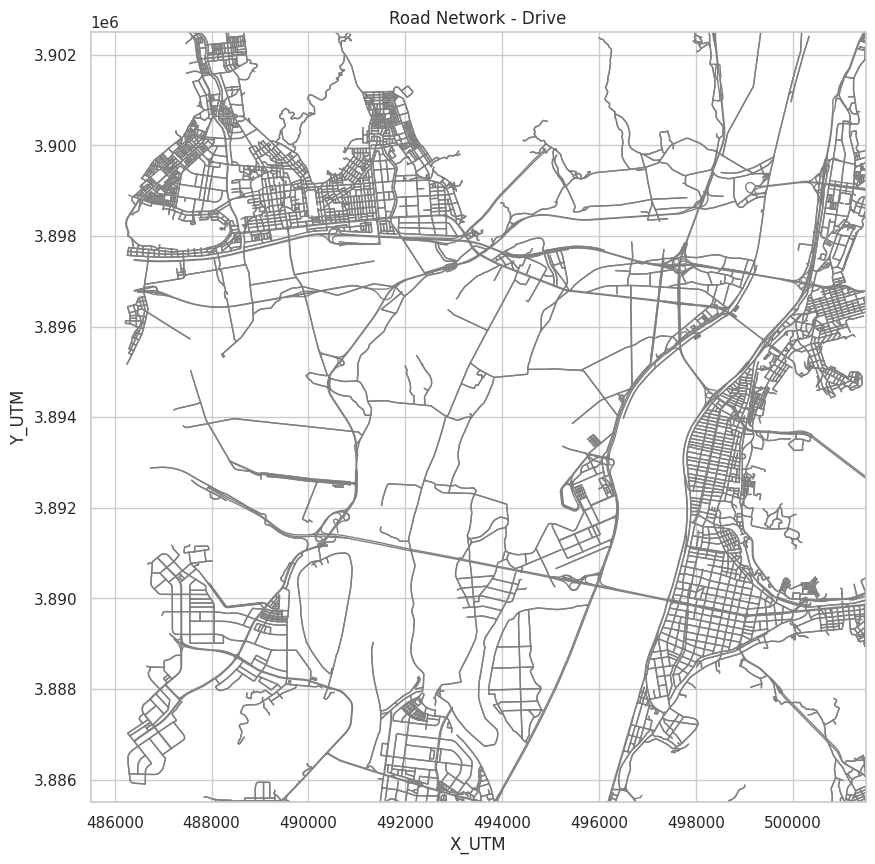

In [29]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plotting df_line_drive
plt.figure(figsize=(10, 10))
for index, row in df_line_drive.iterrows():
    x_coords = row['X_UTM']
    y_coords = row['Y_UTM']
    plt.plot(x_coords, y_coords, color='grey', linewidth=1)

plt.title('Road Network - Drive')
plt.xlabel('X_UTM')
plt.ylabel('Y_UTM')
plt.grid(True)
plt.xlim([485500,501500])
plt.ylim([3885500,3902500])
plt.show()